In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np
from scipy.stats import binned_statistic, linregress

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [4]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [5]:
cat.load(0.658, HOD='abRedMagic')

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.4.dev4134-py2.7-linux-x86_64.egg/halotools/empirical_models/factories/hod_model_factory.py:854: UserWarning: The composite model received multiple component models 
with a new_haloprop_func_dict that use the halo_local_density_percentile key. 
Ignoring the one that appears in the occupation component for satellites galaxies
  warn(msg % (example_repeated_element, feature_name, gal_type))


In [6]:
cat.sf_idxs

array([83, 99])

In [7]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_snapnum',
 'halo_halfmass_scale',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_5',
 'halo_mvir_host_halo']

In [8]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

In [9]:
print float(sum(mass_cut))/len(mass_cut)

3.10153519216e-05


In [10]:
print cat.pmass

591421440.0


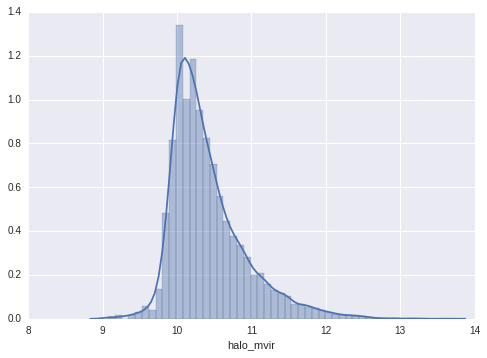

In [11]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

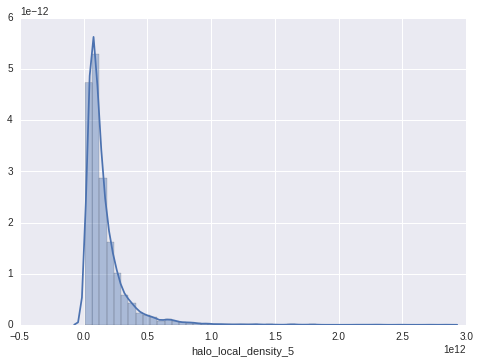

In [12]:
sns.distplot(cat.halocat.halo_table['halo_local_density_5'][rand_idxs], hist=True, kde=True)

In [13]:
print min(cat.halocat.halo_table['halo_local_density_5'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density_5'][rand_idxs])

11182364300.4
2.84416094025e+12


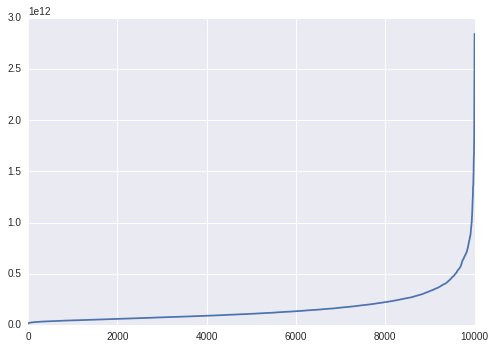

In [14]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density_5'][rand_idxs]))

In [15]:
vol = 4*np.pi/3*(5**3)

In [16]:
print sorted(cat.halocat.halo_table['halo_local_density_5'][rand_idxs]*vol/(100*cat.pmass))[:50]

[98.999999999999986, 119.99999999999999, 135.99999999999997, 141.99999999999997, 142.99999999999997, 144.99999999999997, 146.99999999999997, 151.0, 151.0, 152.99999999999997, 154.99999999999997, 155.99999999999997, 157.99999999999997, 158.99999999999997, 159.99999999999997, 161.0, 161.99999999999997, 161.99999999999997, 162.99999999999997, 164.0, 164.99999999999997, 164.99999999999997, 168.0, 168.0, 168.99999999999994, 168.99999999999994, 169.99999999999994, 169.99999999999994, 171.0, 171.99999999999994, 171.99999999999994, 172.99999999999994, 173.99999999999994, 175.0, 175.0, 175.0, 176.99999999999994, 178.0, 178.0, 178.99999999999994, 179.99999999999994, 180.99999999999994, 180.99999999999994, 180.99999999999994, 180.99999999999994, 182.99999999999994, 182.99999999999994, 183.99999999999994, 183.99999999999994, 183.99999999999994]


In [17]:
rho_b = cat.halocat.halo_table['halo_local_density_5']

In [18]:
rho_halo = cat.halocat.halo_table['halo_mvir']/(4*np.pi/3*cat.halocat.halo_table['halo_rvir']**3)

In [19]:
relative_density = rho_halo/rho_b

(array([  5.18115000e+05,   1.41735300e+06,   1.75642900e+06,
          1.80962200e+06,   1.71349800e+06,   1.56850100e+06,
          1.41341500e+06,   1.25749300e+06,   1.10768100e+06,
          9.63770000e+05,   8.39290000e+05,   7.14377000e+05,
          6.25067000e+05,   5.20934000e+05,   4.58431000e+05,
          3.88085000e+05,   3.26302000e+05,   2.84040000e+05,
          2.42219000e+05,   1.95454000e+05,   1.76751000e+05,
          1.39572000e+05,   1.24558000e+05,   1.04136000e+05,
          8.09720000e+04,   7.27450000e+04,   5.94870000e+04,
          5.29240000e+04,   4.15220000e+04,   3.31810000e+04,
          2.93350000e+04,   2.27180000e+04,   2.03390000e+04,
          1.81360000e+04,   1.55430000e+04,   1.22180000e+04,
          8.70100000e+03,   8.94300000e+03,   6.52700000e+03,
          7.02800000e+03,   4.06400000e+03,   4.34900000e+03,
          3.81000000e+03,   2.49100000e+03,   2.13700000e+03,
          2.34900000e+03,   1.61300000e+03,   9.35000000e+02,
        

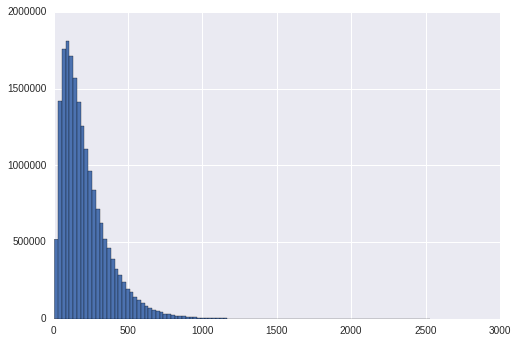

In [20]:
plt.hist(relative_density, bins=100)

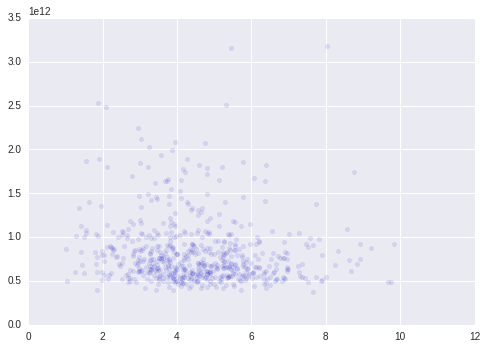

In [21]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density_5'][mass_cut], alpha=0.1)

In [22]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e5), replace = False)
mass_cut = np.logical_and(cat.halocat.halo_table['halo_mvir']> 1e13, cat.halocat.halo_table['halo_mvir']< 1e15)

In [23]:
dex = 0.2
mass_bin = 1e13
mass_cut1 =  cat.halocat.halo_table['halo_mvir']> mass_bin
mass_cut2 = cat.halocat.halo_table['halo_mvir'] < 10**(np.log10(mass_bin)+dex) 
mass_cut = np.logical_and(mass_cut1, mass_cut2)

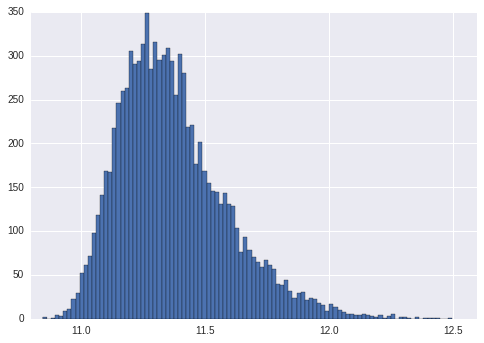

In [24]:
plt.hist(np.log10(cat.halocat.halo_table['halo_local_density_5'][mass_cut]), bins = 100);

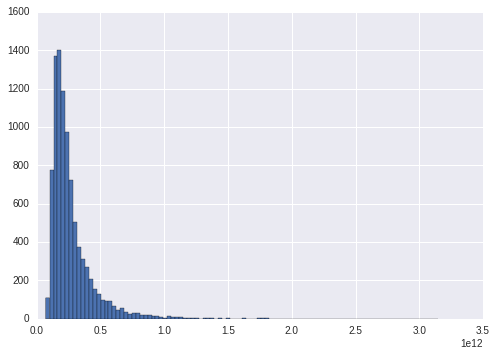

In [25]:
plt.hist(cat.halocat.halo_table['halo_local_density_5'][mass_cut], bins = 100);

In [26]:
from scipy.stats import boxcox
bc_rho, maxlam = boxcox(np.log10(cat.halocat.halo_table['halo_local_density_5'][mass_cut]) )

In [27]:
print maxlam

-12.5580888189


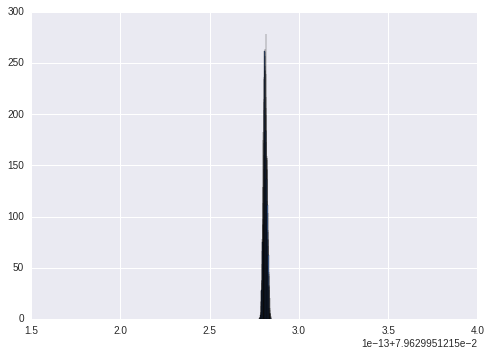

In [28]:
plt.hist(bc_rho, bins = 100);

In [29]:
from scipy.stats import shapiro
W, p = shapiro(np.log10(cat.halocat.halo_table['halo_local_density_5'][mass_cut]))
print p

1.40129846432e-45


/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
np.mean(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

5.4401908

In [31]:
var = np.mean(np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]))**2*0.18**2
print np.sqrt(var)

0.126122145653


In [32]:
from scipy.stats import lognorm, norm

In [33]:
n_particles = cat.halocat.halo_table['halo_local_density_5']*(4*np.pi/300*10**3)/(cat.pmass)
rho_bar = 2048**3/(400.0**3)*(4*np.pi/300*10**3)
cat.halocat.halo_table['halo_rorb']= n_particles/rho_bar

In [34]:
print np.mean(cat.halocat.halo_table['halo_nfw_conc'])
print np.mean(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

9.66096
5.44019


In [35]:
print np.max(cat.halocat.halo_table['halo_nfw_conc'])
print np.max(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

3733.12
24.9212


In [36]:
nbins = 10

In [37]:
binned_rho, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_local_density_5'][mass_cut]), bins = nbins)

In [38]:
binned_rho_std, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_local_density_5'][mass_cut]),\
                statistic= np.std, bins = nbins)

In [39]:
print bin_edges
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

[ 13.00043392  13.020366    13.04029808  13.06023016  13.08016224
  13.10009432  13.1200264   13.13995848  13.15989056  13.17982264
  13.19975471]


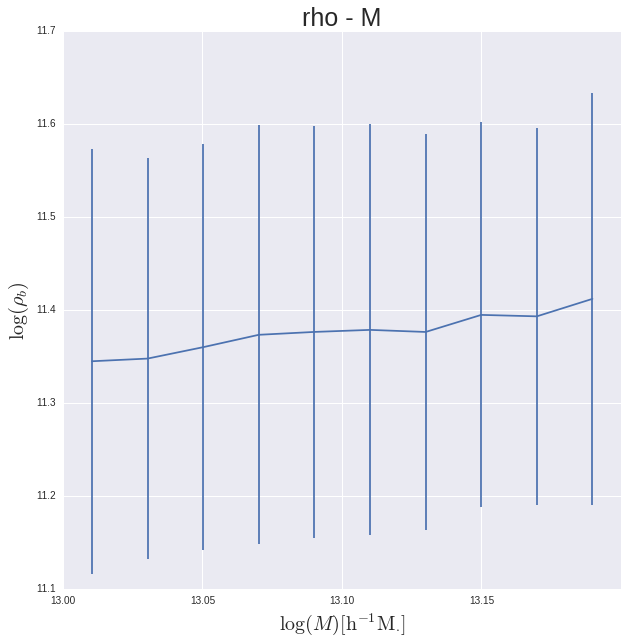

In [40]:
fig = plt.figure(figsize=(10,10))
plt.title('rho - M', fontsize = 25)
plt.errorbar(bin_centers, binned_rho, binned_rho_std)

#plt.plot(bin_centers, -0.13*bin_centers+2.45, color = 'r', label = 'Literature (Slope = -0.13)')
#plt.fill_between(bin_centers,1.18*(-0.13*bin_centers+2.45), (-0.13*bin_centers+2.45)/1.18, color = 'r', alpha = .2 )
#plt.loglog()
plt.xlabel(r'$\log(M) \mathrm{[h^{-1} M_{\cdot}]}$', fontsize = 20)
plt.ylabel(r'$\log(\rho_b)$', fontsize = 20)
#plt.legend(loc='best')
plt.show()

In [41]:
binned_conc, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]), bins = nbins)

In [42]:
binned_conc_std, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]),\
                statistic= np.std, bins = nbins)

In [43]:
print bin_edges
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

[ 13.00043392  13.020366    13.04029808  13.06023016  13.08016224
  13.10009432  13.1200264   13.13995848  13.15989056  13.17982264
  13.19975471]


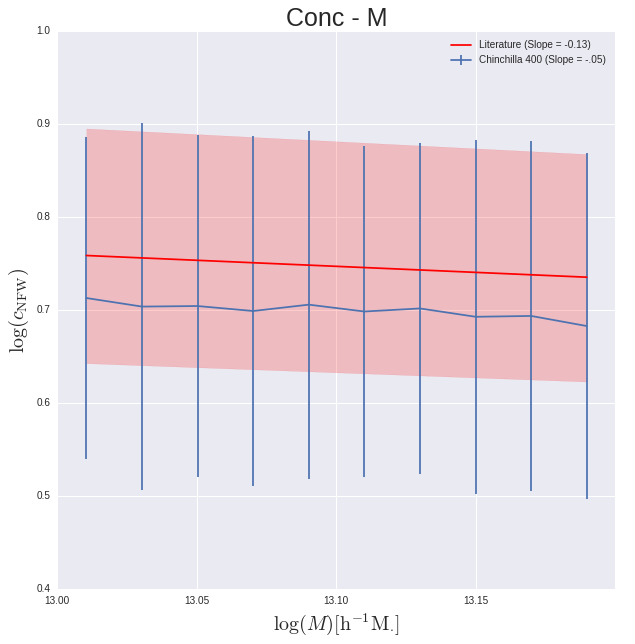

In [44]:
fig = plt.figure(figsize=(10,10))
plt.title('Conc - M', fontsize = 25)
plt.errorbar(bin_centers, binned_conc, binned_conc_std, label = 'Chinchilla 400 (Slope = -.05)')

plt.plot(bin_centers, -0.13*bin_centers+2.45, color = 'r', label = 'Literature (Slope = -0.13)')
plt.fill_between(bin_centers,1.18*(-0.13*bin_centers+2.45), (-0.13*bin_centers+2.45)/1.18, color = 'r', alpha = .2 )
#plt.loglog()
plt.xlabel(r'$\log(M) \mathrm{[h^{-1} M_{\cdot}]}$', fontsize = 20)
plt.ylabel(r'$\log(c_{\mathrm{NFW}})$', fontsize = 20)
plt.legend(loc='best')
plt.show()

In [45]:
slope, intercept, r, p, err = linregress(bin_centers, binned_conc)
print slope, intercept, r

-0.121227980065 2.28760653212 -0.877016959132


In [46]:
binned_conc, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_rorb'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]), bins = nbins)

In [47]:
binned_conc_std, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_rorb'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]),\
                statistic= np.std, bins = nbins)

In [48]:
print bin_edges
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

[-0.05232046  0.11271014  0.27774073  0.44277133  0.60780193  0.77283252
  0.93786312  1.10289372  1.26792431  1.43295491  1.59798551]


In [49]:
slope, intercept, r, p, err = linregress(bin_centers, binned_conc)
print slope, intercept, r

0.10831630636 0.672374458557 0.597021067869


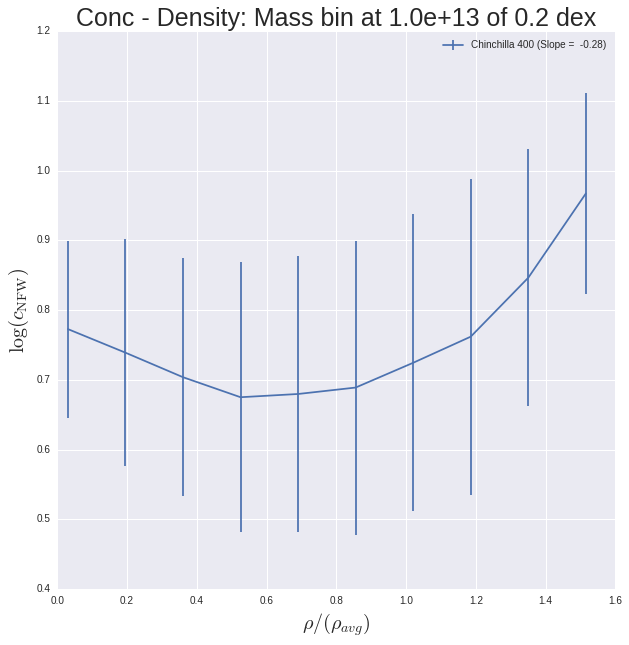

In [50]:
fig = plt.figure(figsize=(10,10))
plt.title('Conc - Density: Mass bin at %.1e of 0.2 dex'%mass_bin, fontsize = 25)
plt.errorbar(bin_centers, binned_conc, binned_conc_std, label = 'Chinchilla 400 (Slope =  -0.28)')

#plt.plot(bin_centers, -0.13*bin_centers+2.45, color = 'r', label = 'Literature (Slope = ?)')
#plt.fill_between(bin_centers,1.18*(-0.13*bin_centers+2.45), (-0.13*bin_centers+2.45)/1.18, color = 'r', alpha = .2 )
#plt.loglog()
plt.xlabel(r'$\rho/(\rho_{avg})$', fontsize = 20)
plt.ylabel(r'$\log(c_{\mathrm{NFW}})$', fontsize = 20)
plt.legend(loc='best')
plt.show()

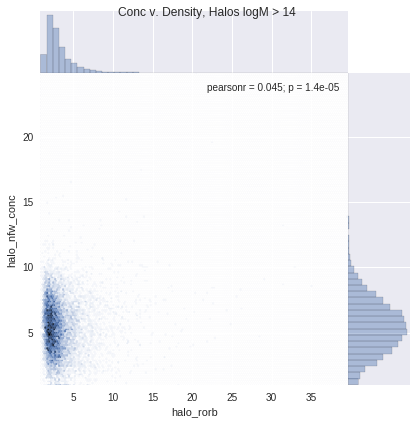

In [51]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 14')

In [52]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_snapnum',
 'halo_halfmass_scale',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_5',
 'halo_mvir_host_halo',
 'halo_rorb']

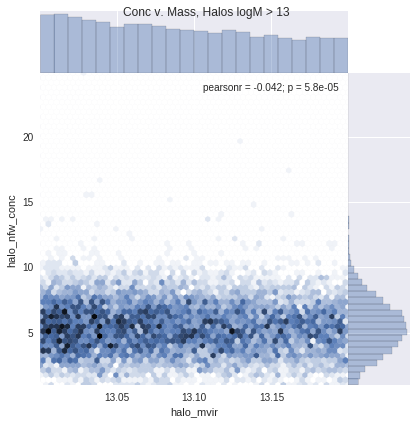

In [53]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]),\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Mass, Halos logM > 13')

In [54]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_mvir'][mass_cut]<10**14.25)

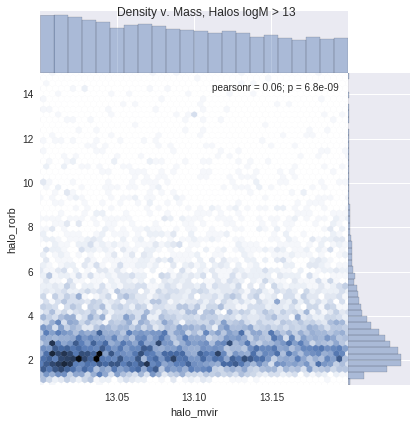

In [55]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut][idxs]),\
         cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Density v. Mass, Halos logM > 13')

In [56]:
sns.jointplot(cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3),\
         cat.halocat.halo_table['halo_local_density'][mass_cut]/100, kind = 'hex', space=0)

KeyError: 'halo_local_density'

In [ ]:
ratio = (cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3))/cat.halocat.halo_table['halo_local_density'][mass_cut]

In [ ]:
ratio.mean(), ratio.std()

In [ ]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], kind = 'hex', space=0)

In [ ]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

In [ ]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [ ]:
cat.model.param_dict

In [ ]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [ ]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

In [ ]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 0.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0.0

In [ ]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [ ]:
cat.model.param_dict

In [ ]:
cat.calc_number_density()

In [ ]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [ ]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [ ]:
wp_vals.shape

In [ ]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [ ]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

In [ ]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [ ]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [ ]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()